# Linear Regression

## Hypothesis

$h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $ + ... , x_1, x_2 , ...x_n features

## Cost Function (incluida regularization)
$J(\theta) = \frac{1}{2m} [\sum \limits _{i=1} ^{m} (h_\theta (x^{(i)} ) - y^{(i)} )^2  + \lambda \sum \limits _{j=1} ^{n} \theta_j^2]$

## Goal

$ minimize_\theta J(\theta) $

## Gradiente (incluida regularization)

$ Grad (\theta_j) = \frac{1}{m} \sum \limits _{i=1} ^{m} (h_\theta (x^{(i)} ) - y^{(i)} ) x_j ^{(i)} + \frac {\lambda}{m}\theta_j $

$ \theta_0 $ no se regulariza

## Gradient Descent (incluida regularization)

$ \theta_j := \theta_j - \alpha Grad(\theta_j) $

$ \theta_j := \theta_j ( 1 - \alpha \frac {\lambda}{m} ) -  \alpha \frac {1}{m} \sum \limits _{i=1} ^{m} (h_\theta (x^{(i)} ) - y^{(i)} ) x_j ^{(i)} $


## Linear Regression : Una variable

### Preparamos y visualizamos los datos

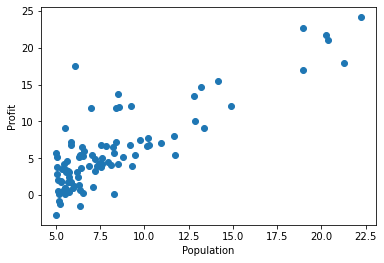

In [4]:
import numpy as np
import sys
sys.path.append ('../src') 
from LinearRegression import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

# Leer los datos y visualizar

import pandas as pd

dataset =pd.read_csv('data/ex1data1.txt', sep=',',header=None)  # población, beneficio
population = dataset.values [:,0:1]
profit = dataset.values [:,1:2]

data = {'a': population.reshape ((1,dataset.shape[0])),
        'b':profit.reshape((1,dataset.shape[0]))
       }
plt.scatter('a', 'b', data=data)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()


### Ejecutamos el algoritmo

LR = 0.0075: 100%|█████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 8154.20it/s]


Mean Squared Error: 9.52
Coefficient of determination: 0.68
Mean Squared Error: 8.95
Coefficient of determination: 0.70


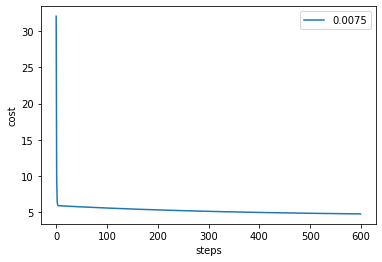

In [5]:
minibatch = False
experiment_parameters = {'learning_rate' : 0.0075 , 'steps':600 , 'theta_init' : 'zeros','lambda':0.0, 'mini_batch_size':2**5}
lr1 = LinearRegression(optimizer='GD',minibatch=minibatch,normalization=False,kargs=experiment_parameters)
lr1.train (population,profit)
lr2 = LinearRegression(optimizer='Normal',normalization=False)
lr2.train (population,profit)

if minibatch:
    steps = np.arange (experiment_parameters['steps'] * len (lr1.minibatches)) 
else:
    steps = np.arange (experiment_parameters['steps'] ) 
costs = lr1.costs
plt.plot( steps , costs,label=str(experiment_parameters['learning_rate']))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()


### Comparamos nuestro modelo con los datos originales

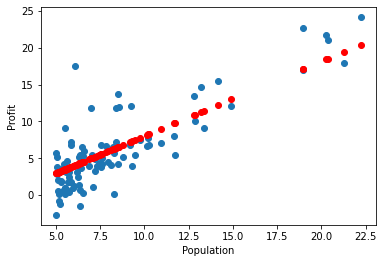

In [6]:
prediction = lr1.predict (population)

data_a = {'a': population.reshape ((1,dataset.shape[0])),
        'b':prediction.reshape((1,dataset.shape[0]))
       }

data_b = {'a': population.reshape ((1,dataset.shape[0])),
        'b':profit.reshape((1,dataset.shape[0]))
       }
plt.scatter('a', 'b', data=data_b)
plt.scatter('a', 'b', c='red',data=data_a)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()


## Linear Regression : Multiples Variables

In [9]:
dataset =pd.read_csv('data/ex1data2.txt', sep=',',header=None)  # size of house, #bedrooms,price
X     = dataset.values [:,0:2]
price = dataset.values  [:,2:3]

LR = 0.003: 100%|████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 9452.21it/s]


Mean Squared Error: 4161931959.71
Coefficient of determination: 0.73
[[336656.50747404 102144.93814453   1730.39874617]]
Mean Squared Error: 4086560101.21
Coefficient of determination: 0.73
[[340412.65957447 110631.05027885  -6649.47427082]]


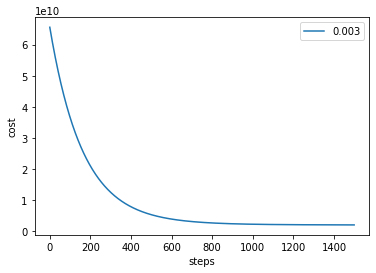

In [10]:
experiment_parameters = {'learning_rate' : 0.003 , 'steps':1500, 'theta_init' : 'zeros','lambda':0.0}

lr1 = LinearRegression(optimizer='GD',kargs=experiment_parameters)
lr1.train (X,price)
print (lr1.vtheta)

lr2 = LinearRegression(optimizer='Normal')
lr2.train (X,price)
print (lr2.vtheta)

# Plotting costs for GD

steps = np.arange (experiment_parameters['steps'])
costs = lr1.costs
plt.plot( steps , costs,label=str(experiment_parameters['learning_rate']))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

## Polynomial Regression - adding features

In [11]:
dataset =pd.read_csv('data/ex1data2.txt', sep=',',header=None)  # size of house, #bedrooms,price
X_orig     = dataset.values [:,0:2]
price = dataset.values  [:,2:3]

#Creating new features x= [x1,x2,x1**2,x1*x2,x2**2,x1**3,x1**2 .... ]

degree = 6
X = None
index = 0
for i in range(degree+1):
    for j in  range (i+1):
        new_column =  X_orig[:,0:1]**(i-j) * X_orig[:,1:2]**(j)
        if X is None: 
            X = new_column
        else:
            X = np.concatenate((X,new_column),axis=1)   
        index += 1
X = np.delete (X,0,axis=1)


LR = 0.003: 100%|████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 8977.48it/s]


Mean Squared Error: 3926711035.96
Coefficient of determination: 0.74
Mean Squared Error: 8736967227.46
Coefficient of determination: 0.43


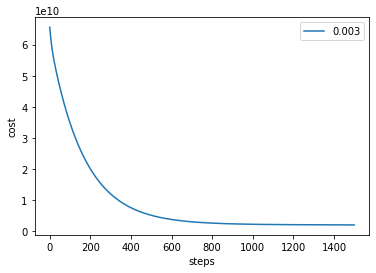

In [12]:
experiment_parameters = {'learning_rate' : 0.003 , 'steps':1500, 'theta_init' : 'zeros','lambda':0.9}
lr1 = LinearRegression(optimizer='GD',kargs=experiment_parameters)
lr1.train (X,price)


lr2 = LinearRegression(optimizer='Normal')
lr2.train (X,price)

# Plotting costs for GD

steps = np.arange (experiment_parameters['steps'])
costs = lr1.costs
plt.plot( steps , costs,label=str(experiment_parameters['learning_rate']))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()


## BOSTON HOUSING DATASET

In [13]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston ()
X = boston.data
Y = np.array(boston.target).reshape (len(boston.target),1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)



In [14]:
experiment_parameters_norm = {'learning_rate' : 0.05999 , 'steps':75, 'theta_init' : 'zeros','lambda':0.0,'mini_batch_size':2**12}
experiment_parameters_no_norm = {'learning_rate' : 0.00000639 , 'steps':500000, 'theta_init' : 'zeros','lambda':0.0,'mini_batch_size':2**16}

lr1 = LinearRegression(optimizer='GD',minibatch=False,kargs=experiment_parameters_norm)
lr1.train (X_train,Y_train)

lr2 = LinearRegression(optimizer='Normal')
lr2.train (X_train,Y_train)


LR = 0.05999: 100%|█████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 18639.14it/s]

Mean Squared Error: 22.31
Coefficient of determination: 0.74
Mean Squared Error: 21.29
Coefficient of determination: 0.75


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

prediction = lr1.predict (X_test)
print ('Mean Squared Error: %.2f' % mean_squared_error(Y_test,prediction))
print ('Coefficient of determination: %.2f' % r2_score(Y_test,prediction))


Mean Squared Error: 26.91
Coefficient of determination: 0.65


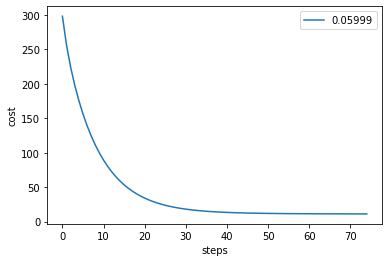

In [16]:
# Plotting costs for GD

steps = np.arange (experiment_parameters_norm['steps'])
costs = lr1.costs
plt.plot( steps , costs,label=str(experiment_parameters_norm['learning_rate']))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()
